In [1]:
#trying to find the best p (best number of lag observations)
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot
import warnings, datetime, csv,itertools, pandas as pd, matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/home/reem/Desktop/codes/WQ/wqfull.csv')
df['datetime'] =  pd.to_datetime(df['datetime'], format='%d/%m/%Y %H:%M')

In [3]:
mylist = df.groupby([df['datetime'].dt.date])
xx = mylist['106605_00095'].apply(list)

date_measurements = [xx[i] for i in range(len(xx)) if len(xx[i])==240]

date_measurements = np.array(date_measurements)

inds = np.where(np.isnan(date_measurements))
badind = list(set(inds[0]))

date_measurements = np.delete(date_measurements, ([i for i in badind]), axis=0)

date_measurements = [date_measurements[i][j] for i in range(len(date_measurements)) for j in range(0,240,10)] 
date_measurements = np.array(date_measurements)

date_measurements=date_measurements.reshape(int(len(date_measurements)/24),24)

corr_list = []
for i in range(((date_measurements[0].shape)[0])):
    corr  = np.corrcoef(date_measurements[:,0],date_measurements[:,i])
    corr_list.append(corr[0,1])

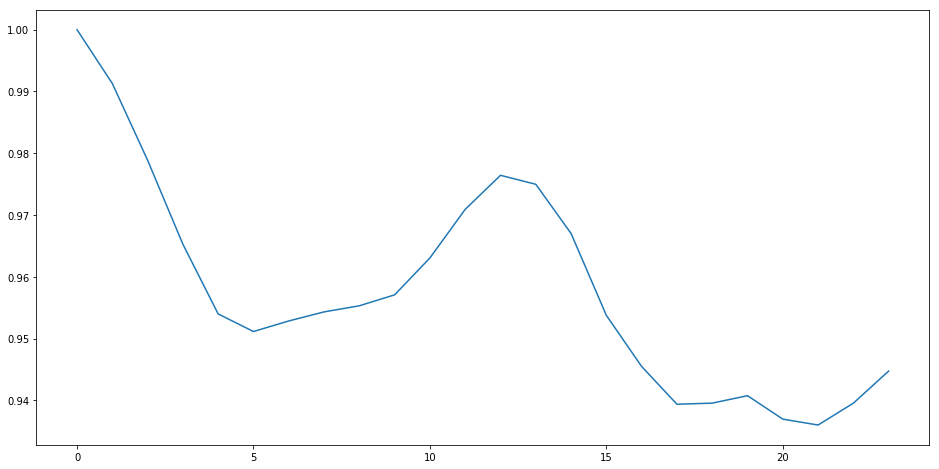

In [89]:
plt.figure(figsize=(16,8))
plt.plot(corr_list)
pyplot.show()

<Figure size 1152x576 with 0 Axes>

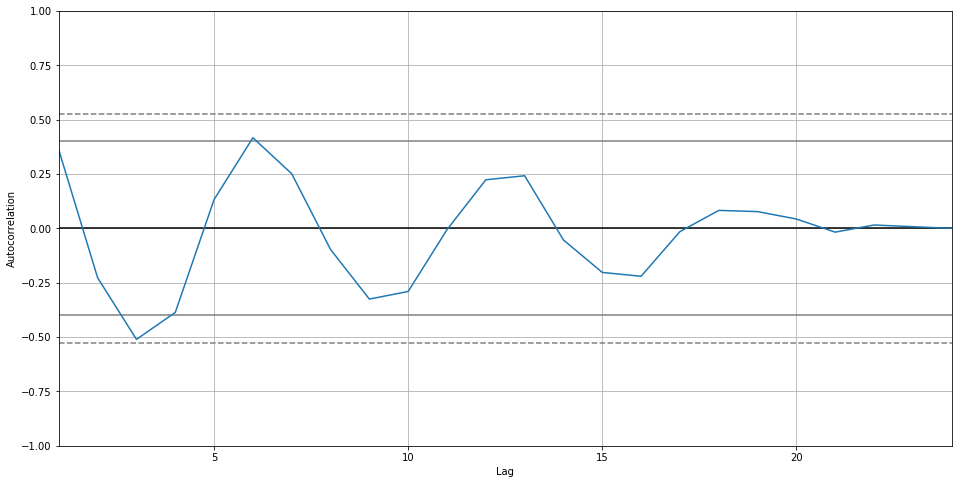

In [94]:
plt.figure(figsize=(16,8))
autocorrelation_plot(date_measurements[0])
pyplot.show()

# Direct Multi-step Forecast

In [6]:
from statsmodels.tsa.arima_model import ARIMA
import pandas as pd

# Recursive Multi-step Forecast

# Direct-Recursive Hybrid Forecast

# Multiple Output Forecast

In [7]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [8]:
alldata = pd.Series(date_measurements.flatten())
daydata = pd.Series(date_measurements[:,119])
nightdata = pd.Series(date_measurements[:,0])

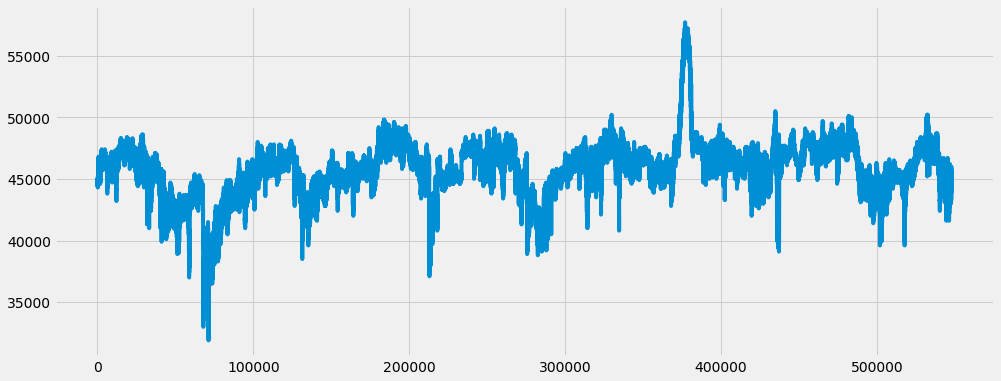

In [8]:
alldata.plot(figsize=(15, 6))
plt.show()

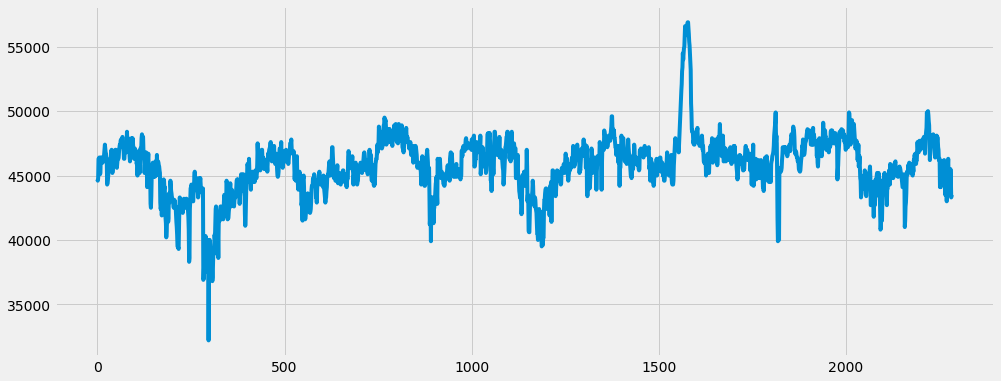

In [9]:
nightdata.plot(figsize=(15, 6))
plt.show()

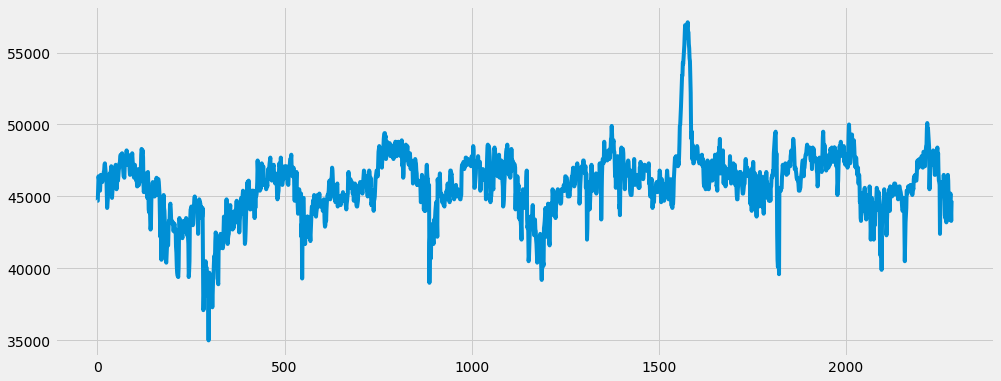

In [10]:
daydata.plot(figsize=(15, 6))
plt.show()

In [11]:
# Define the p as value between 0 and 18 d and q parameters to be either 0 and 1
p = range(0,19)
d = q = range(0, 2)

# Generate all different combinations of p, q and q 
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d and q
# 12 is for the season so in this case we are working with yearly periods

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# print('Examples of parameter combinations for Seasonal ARIMA...')
# print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
# print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
# print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
# print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

# Day data AIC comparison

In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(daydata[:30],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:707.0479425700548
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:288.830135347047
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:308.04808151934094
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:107.17599641166588
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:96.85603468674003
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:665.2356097542958
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:264.7315399352997
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:425.6629691308472
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:103.13466997331197
ARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:147.88489491640257
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:425.76278139811996
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:252.60023536648043
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:259.62916911798754
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:83.41670624752257
ARIMA(0, 1, 0)x(2, 0, 0, 12)12 - AIC:85.21217270435234
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:404.4864934466768
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:233.66341238983767
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:256.7358473494017
ARI

# Night data AIC comparison

In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(nightdata[:30],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:706.9841867367769
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:291.80024694932973
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:310.9728108675375
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:106.98031071710848
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:97.78058559457077
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:665.2740385467987
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:266.2615697892907
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:425.65238859175884
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:103.6389909656589
ARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:147.8811077049326
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:438.26432319288415
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:259.9952573150481
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:265.30312895724256
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:84.09627236876486
ARIMA(0, 1, 0)x(2, 0, 0, 12)12 - AIC:83.62375717757119
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:425.3765031607308
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:244.72416482143922
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:266.865568304386
ARIMA

# Day data results

In [12]:
mod = sm.tsa.statespace.SARIMAX(daydata,
                                order=(2, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0237      0.015     -1.605      0.108      -0.053       0.005
ar.L2         -0.1044      0.018     -5.781      0.000      -0.140      -0.069
ar.S.L12      -0.4746      0.011    -41.584      0.000      -0.497      -0.452
sigma2      7.736e+05   1.25e+04     61.673      0.000    7.49e+05    7.98e+05


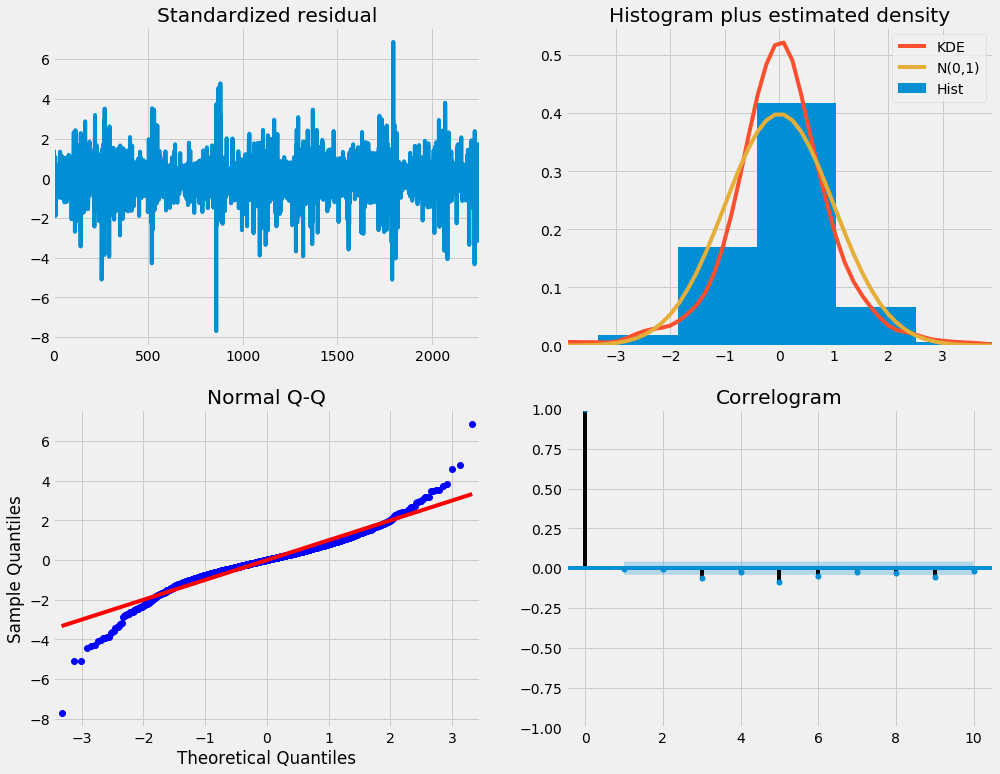

In [13]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

# Night data results

In [9]:
mod = sm.tsa.statespace.SARIMAX(nightdata,
                                order=(4, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0687      0.015     -4.691      0.000      -0.097      -0.040
ar.L2         -0.1124      0.016     -7.234      0.000      -0.143      -0.082
ar.L3         -0.0032      0.019     -0.173      0.863      -0.040       0.033
ar.L4         -0.0891      0.020     -4.562      0.000      -0.127      -0.051
ar.S.L12      -0.4892      0.010    -47.461      0.000      -0.509      -0.469
sigma2      7.628e+05   1.15e+04     66.590      0.000     7.4e+05    7.85e+05


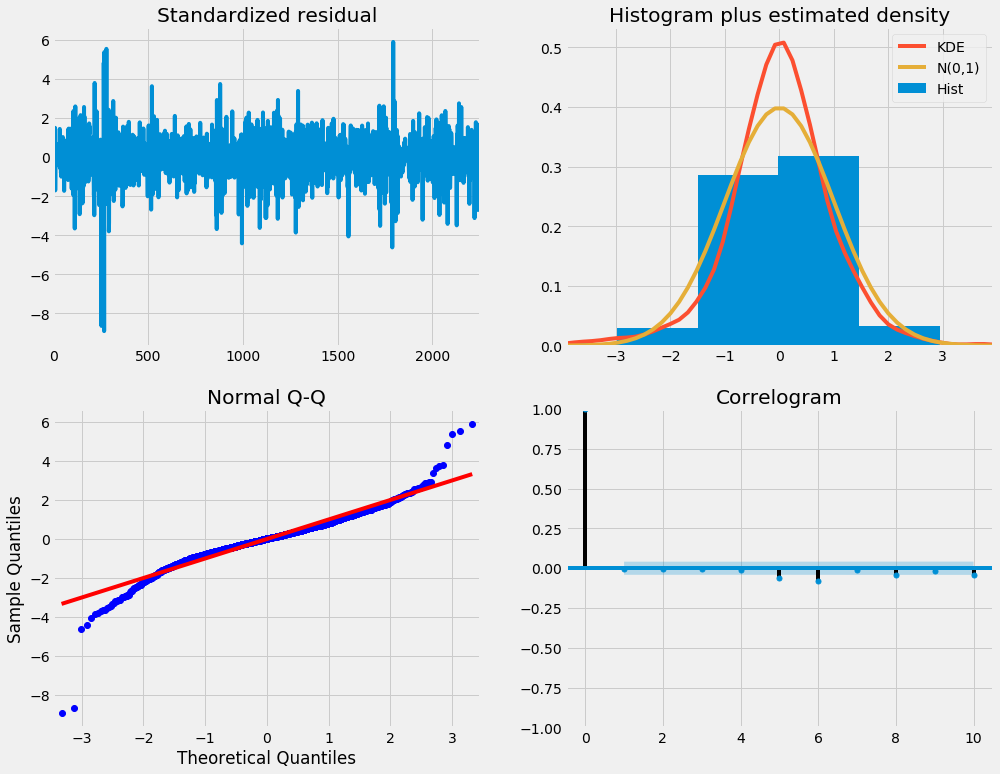

In [10]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()